In [82]:
import pandas as pd
import os

PATH_IN = './data/'
fname = os.path.join(PATH_IN, 'gunshot_deaths.csv')
df = pd.read_csv(fname, index_col=0)
df.head(5)

,Intent,Gender,Age,Race,Deaths,Population,Rate
1,None selected,None selected,None selected,None selected,33599,316299978,10.6
2,None selected,None selected,None selected,White,22079,197369634,11.2
3,None selected,None selected,None selected,Black,7765,38896382,20.0
4,None selected,None selected,None selected,Hispanic,3007,54049078,5.6
5,None selected,None selected,None selected,Asian/Pacific Islander,442,16315561,2.7


['None selected' 'Suicide' 'Homicide' 'Accident' 'Unknown']


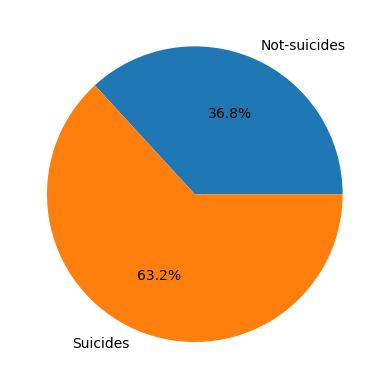

In [83]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots()

# these are all the possible intents for the gunshot deaths collected in the dataset
print(df["Intent"].unique())

# get the number of gunshot deaths that have a valid Intent and it's not Suicide
not_suicides_count = df[~df["Intent"].isin(["None selected", "Unknown", "Suicide"])]["Deaths"].sum()

# get the number of gunshot deaths that have Suicide as their intent
suicides = df[df["Intent"] == "Suicide"]
suicides_count = suicides["Deaths"].sum()

# plot the data in a pie graph
ax.pie([not_suicides_count, suicides_count], labels=["Not-suicides", "Suicides"], autopct="%.1f%%")
plt.show()

['None selected' 'Female' 'Male']


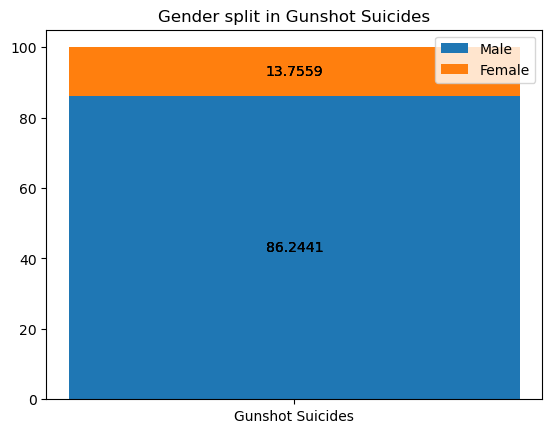

In [84]:
# print all possible genders in the dataset
genders = suicides["Gender"].unique()
print(genders)

female_suicides_count = suicides[suicides["Gender"] == "Female"]["Deaths"].sum()
male_suicides_count = suicides[suicides["Gender"] == "Male"]["Deaths"].sum()
total_valid_suicides = female_suicides_count + male_suicides_count
results = {"Male": male_suicides_count / total_valid_suicides * 100, "Female": female_suicides_count / total_valid_suicides * 100}

fig, ax = plt.subplots()
bottom = np.zeros(3)

for gender, gender_count in results.items():
    p = ax.bar(["Gunshot Suicides"], gender_count, 0.6, label=gender, bottom=bottom)
    bottom += gender_count

    ax.bar_label(p, label_type='center')

ax.set_title('Gender split in Gunshot Suicides')
ax.legend()

plt.show()

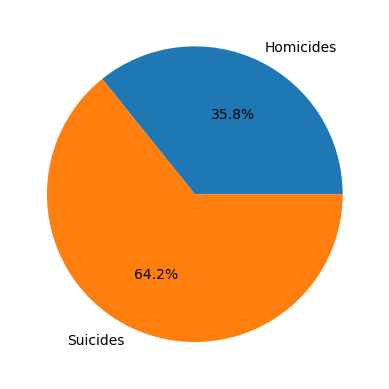

In [85]:
# get the number of gunshot deaths that have Homicide as their intent
homicides = df[df["Intent"] == "Homicide"]
homicides_count = homicides["Deaths"].sum()

fig, ax = plt.subplots()

# plot the data in a pie graph
ax.pie([homicides_count, suicides_count], labels=["Homicides", "Suicides"], autopct="%.1f%%")
plt.show()

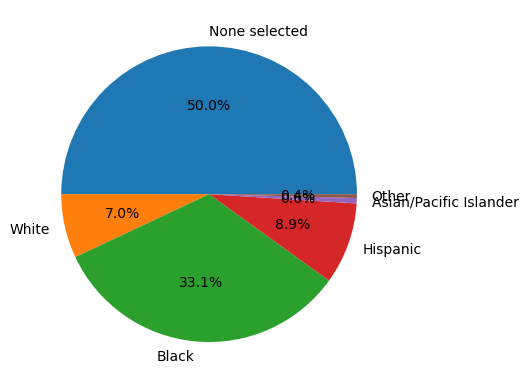

In [86]:
young_male_homicide_victims = homicides[(homicides["Gender"] == "Male") & (homicides["Age"] == "15 - 34")]

races = young_male_homicide_victims["Race"].unique()

fig, ax = plt.subplots()

# plot the data in a pie graph
ax.pie([young_male_homicide_victims[young_male_homicide_victims["Race"] == race]["Deaths"].sum() for race in races], labels=races, autopct="%.1f%%")
plt.show()

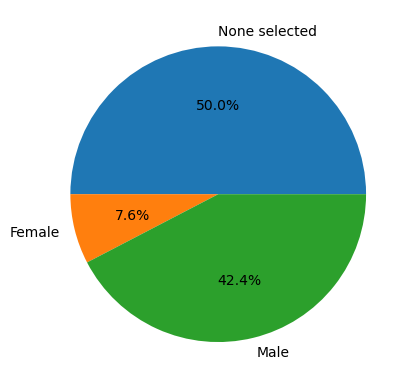

In [87]:
genders = homicides["Gender"].unique()

fig, ax = plt.subplots()

ax.pie([homicides[homicides["Gender"] == gender]["Deaths"].sum() for gender in genders], labels=genders, autopct="%.1f%%")
plt.show()